In [23]:
import numpy as np
import pandas as pd
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SpatialDropout1D
from keras.layers import LSTM
from keras.datasets import imdb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
max_words = 20_000
line_length = 80
batch_size = 32

In [3]:
# http://ai.stanford.edu/~amaas/data/sentiment/
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [4]:
# number of reviews
x_train.shape

(25000,)

In [5]:
# words in each review
for i in range(10):
    print(i, len(x_train[i]))

0 218
1 189
2 141
3 550
4 147
5 43
6 123
7 562
8 233
9 130


In [6]:
# sentiment, positive or negative
np.unique(y_train)

array([0, 1])

In [7]:
# mapping dictionaries
word_to_id = imdb.get_word_index()
id_to_word = {v:k for k,v in word_to_id.items()}

In [8]:
word_to_id['this']

11

In [9]:
id_to_word[11]

'this'

In [10]:
id_to_word[0] = '<START>'

In [11]:
def review(index):
    return ' '.join([id_to_word[max(0, idx-3)] for idx in x_train[index]])

In [12]:
review(0)

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <START> is an amazing actor and now the same being director <START> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the <START> of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [13]:
y_train[0]

1

In [15]:
# make all rows the same length
x_train = sequence.pad_sequences(x_train, maxlen=line_length)
x_test = sequence.pad_sequences(x_test, maxlen=line_length)

In [16]:
x_train.shape

(25000, 80)

In [18]:
model = Sequential()
model.add(Embedding(max_words, 128))
model.add(LSTM(128, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 88s 4ms/step - loss: 0.5171 - acc: 0.7466 - val_loss: 0.4063 - val_acc: 0.8214
Epoch 2/10
25000/25000 [==============================] - 87s 3ms/step - loss: 0.3713 - acc: 0.8401 - val_loss: 0.3841 - val_acc: 0.8320
Epoch 3/10
25000/25000 [==============================] - 90s 4ms/step - loss: 0.2904 - acc: 0.8814 - val_loss: 0.3936 - val_acc: 0.8366
Epoch 4/10
25000/25000 [==============================] - 89s 4ms/step - loss: 0.2419 - acc: 0.9052 - val_loss: 0.4192 - val_acc: 0.8288
Epoch 5/10
25000/25000 [==============================] - 90s 4ms/step - loss: 0.1982 - acc: 0.9216 - val_loss: 0.4735 - val_acc: 0.8306
Epoch 6/10
25000/25000 [==============================] - 91s 4ms/step - loss: 0.1618 - acc: 0.9391 - val_loss: 0.5029 - val_acc: 0.8284
Epoch 7/10
25000/25000 [==============================] - 95s 4ms/step - loss: 0.1318 - acc: 0.9514 - val_loss: 0.6155 - val_acc

In [21]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
loss, acc

25000/25000 [==============================] - 17s 667us/step


(0.7517962585592269, 0.8184)

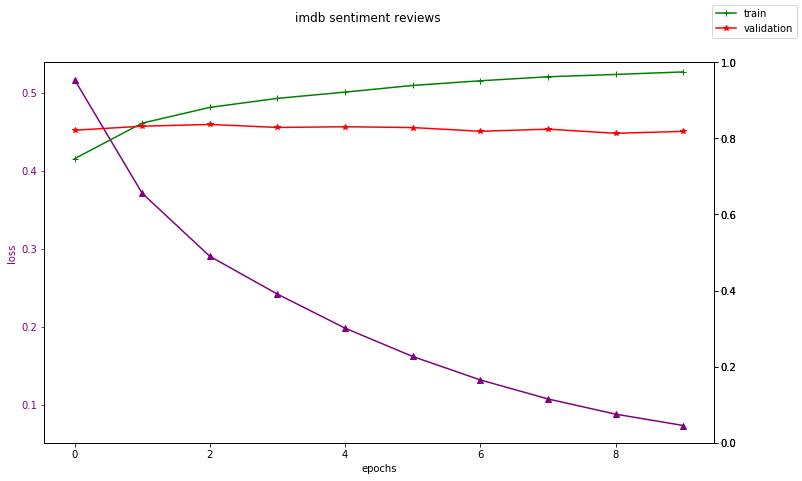

In [25]:
fig, ax1 = plt.subplots(1,1,figsize=(12,7))
ax1.plot(history.epoch, history.history['loss'], marker='^', color='purple')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color='purple')
ax1.tick_params('y', colors='purple')

ax2 = ax1.twinx()
plt.plot(history.epoch, history.history['acc'], marker='+', color='green', label='train')
ax2.set_ylim(0,1)

ax3 = ax1.twinx()
plt.plot(history.epoch, history.history['val_acc'], marker='*', color='red', label='validation')
ax3.set_ylim(0,1)

fig.suptitle('imdb sentiment reviews');
fig.legend();

In [30]:
embedding = model.get_layer('embedding_1').get_weights()
embedding[0].shape

(20000, 128)

In [36]:
#predict sentiment from reviews
bad = "this movie was terrible and bad"
good = "i really liked the movie and had fun"
for review in [good,bad]:
    tmp = []
    for word in review.split(" "):
        tmp.append(word_to_id[word])
    tmp_padded = sequence.pad_sequences([tmp], maxlen=line_length) 
    print("{}. Sentiment: {:.2f}".format(  review, model.predict(np.array([tmp_padded][0]))[0][0]  ))

i really liked the movie and had fun. Sentiment: 0.97
this movie was terrible and bad. Sentiment: 0.32
